# **Final Project: Fraud Detection in Financial Transactions**

## **Overview**




---


> Fraud detection is essential in safeguarding financial institutions and e-commerce platforms from significant financial losses. This project analyzes patterns in fraudulent transactions, focusing on key indicators and relationships that might help stakeholders mitigate fraud risks.



## **Domain Description**



---



> Fraud detection involves analyzing transactional data to identify anomalies that signal fraud. It is critical as the digital economy grows and online transactions become more prevalent.



## **Motivation**



---





> The financial and e-commerce industries face increasing threats from fraud, making it crucial to identify patterns and factors that can predict fraudulent behavior. I chose this domain because of its relevance and impact on global commerce.



### **Stakeholders**



---



- **Banks and Financial Institutions**: To strengthen fraud detection systems and protect their clients.
- **E-commerce Platforms**: To ensure secure transactions for their customers and reduce financial risks.
- **Consumers**: To prevent identity theft and unauthorized transactions.

### **Problem Statement**


---



**This project aims to explore fraud patterns in transactional data to improve fraud detection methods.**

### **Analytical Questions**



---



1. What are the key indicators in a transaction that signal fraud?
   - Motivation: Identifying patterns can improve early fraud detection.
2. How do factors such as profession, income, and security codes correlate with fraudulent transactions?
   - Motivation: Understanding these relationships can help stakeholders focus on high-risk areas.




---



# **Data Loading and Setup**

In [ ]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the CSV file
df = pd.read_csv('/content/data2.csv')




---


> **Explanation:**



*   The pandas library is used to load and manipulate the dataset.


---





### **Display the first few rows of the dataset**

In [ ]:
# Display the first few rows
df.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1
3,LAWYER,43623,341063356109385,01/29,160,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0




---



> **Explanation:**

*   Displays the first 5 rows of the dataset.
*   Helps us visually inspect the dataset to understand its structure and verify that it loaded correctly.


---






### **Display data types and check for missing values**

In [ ]:
# Display data types and check for missing values
print("\n### Dataset Information")
df.info()


### Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Profession          10000 non-null  object
 1   Income              10000 non-null  int64 
 2   Credit_card_number  10000 non-null  int64 
 3   Expiry              10000 non-null  object
 4   Security_code       10000 non-null  int64 
 5   Fraud               10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB




---



> **Explanation:**

*   Shows metadata about the dataset, including column names, data types, and non-null counts.
*   There are 6 columns, all with 10,000 non-null entries, indicating no missing values.
*   Columns like Income, Security_code, and Fraud are numerical (int64).
*   Profession and Expiry are categorical (object).



---







### **Descriptive statistics for numerical columns**

In [ ]:
# Descriptive statistics for numerical columns
print("\n### Summary Statistics")
df.describe()


### Summary Statistics


,Income,Credit_card_number,Security_code,Fraud
count,10000.00000,1.000000e+04,10000.000000,10000.000000
mean,49761.20600,3.851363e+17,863.587800,0.501600
std,28837.72928,1.257950e+18,1484.424959,0.500022
min,1.00000,6.040296e+10,0.000000,0.000000
25%,24863.75000,1.800137e+14,275.000000,0.000000
50%,49483.00000,3.512440e+15,539.500000,1.000000
75%,74483.00000,4.594779e+15,813.250000,1.000000
max,99986.00000,4.999697e+18,9990.000000,1.000000




---





---



> **Explanation:**




*   Provides statistical summaries of numerical columns.


---







## **Data Taxonomy and Variable Nature**

### Variable Classification:
- `Profession`: Categorical (Nominal)
- `Income`: Numerical (Interval)
- `Credit_card_number`: Identifier (Excluded from analysis)
- `Expiry`: Categorical (Nominal)
- `Security_code`: Numerical (Ratio)
- `Fraud`: Binary Target Variable (Nominal)


---



### **Check for missing values**

In [ ]:
# Check for missing values
print("\n### Missing Values")
print(df.isnull().sum())


### Missing Values
Profession            0
Income                0
Credit_card_number    0
Expiry                0
Security_code         0
Fraud                 0
dtype: int64




---





---



> **Explanation:**



*   All columns have 0 missing values.
*   This ensures data completeness, allowing for smooth analysis without needing imputation or row removal.
*   This step confirms data quality, which is crucial for reliable results.



---











## **Exploratory Data Analysis (EDA)**

## **Analyze categorical variables**

In [ ]:
# Analyze categorical variables
print("\n### Categorical Analysis - Profession")
print(df['Profession'].value_counts())


### Categorical Analysis - Profession
Profession
DOCTOR      3379
LAWYER      3357
ENGINEER    3264
Name: count, dtype: int64




---



> **Explanation:**



*   Profession Distribution:



The dataset includes three professions:\
Doctors: 3,379 transactions.\
Lawyers: 3,357 transactions.\
Engineers: 3,264 transactions.\
The data is relatively balanced across professions, with no profession significantly overrepresented.


*   Importance

Understanding the distribution helps assess if fraud occurs more frequently in a specific profession.\
It ensures the dataset’s fairness, as unbalanced data could skew results.


---




## **Group by Profession and Fraud status**

In [ ]:
# Group by Profession and Fraud status
profession_fraud = df.groupby('Profession')['Fraud'].mean()
print("\n### Fraud Rate by Profession")
print(profession_fraud)


### Fraud Rate by Profession
Profession
DOCTOR      0.520568
ENGINEER    0.482843
LAWYER      0.500745
Name: Fraud, dtype: float64




---






---


> **Explanation:**



*   The fraud rate is the mean value of the Fraud column grouped by Profession:\
Doctor: ~52.1% transactions are fraudulent.\
Lawyer: ~50.1% transactions are fraudulent.\
Engineer: ~48.3% transactions are fraudulent.

*   Doctors have the highest fraud rate, followed by lawyers, and then engineers.


---






## Data Visualization




# 1. Income Distribution

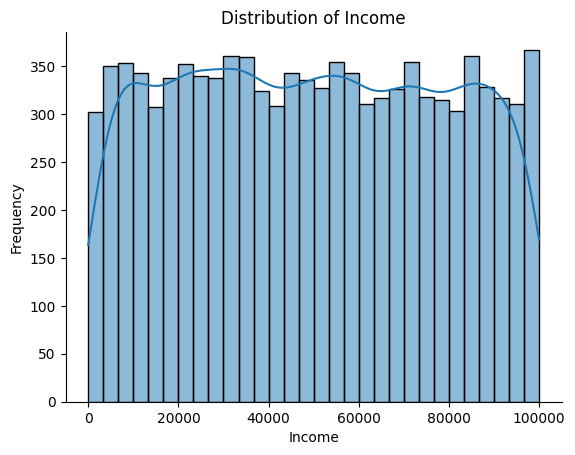

In [ ]:
sns.histplot(df['Income'], kde=True, bins=30)
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
sns.despine()
plt.show()



---



> **Explanation:**


*   Displays the distribution of Income across the dataset.
*   KDE (Kernel Density Estimation) provides a smooth curve for visualizing income density.

*   The income distribution is roughly uniform with peaks around middle-income values.

*   Useful for detecting outliers or skewness.




---








# 2. Income Distribution by Fraud Status

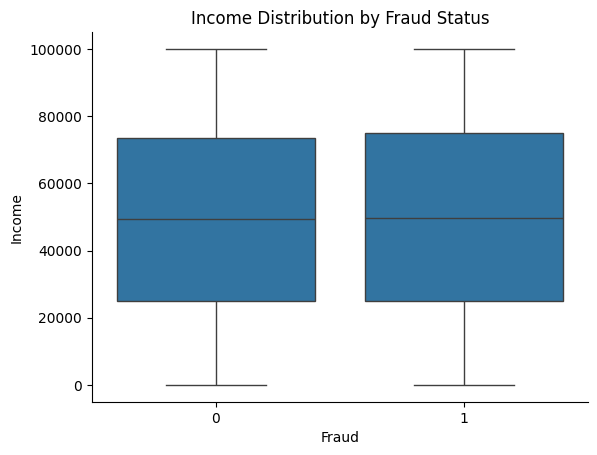

In [ ]:
sns.boxplot(x='Fraud', y='Income', data=df)
plt.title("Income Distribution by Fraud Status")
sns.despine()
plt.show()




---


> **Explanation:**


*   Box Plot:
Compares Income distributions for fraudulent (Fraud = 1) and non-fraudulent (Fraud = 0) transactions.
*   Insights:
Median income is similar across both groups, but fraudulent transactions show more outliers on the lower income side.\
Suggests that lower-income transactions might have higher fraud risk.




---






# 3. Fraud Distribution by Profession

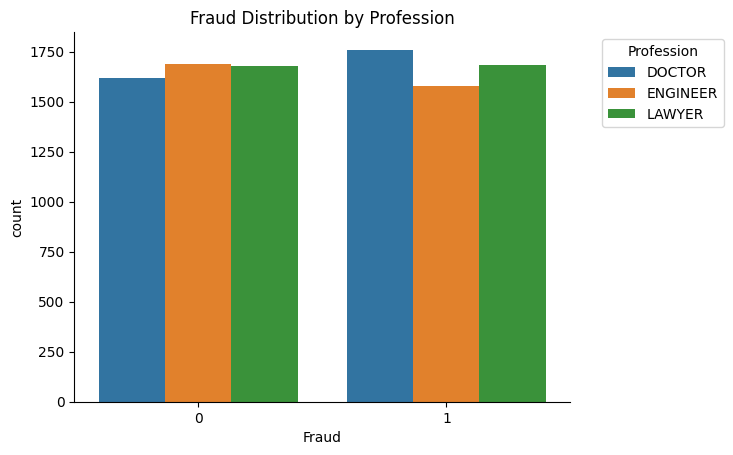

In [ ]:
sns.countplot(x='Fraud', hue='Profession', data=df)
plt.title("Fraud Distribution by Profession")
sns.despine()
plt.legend(title="Profession", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



---



> **Explanation:**


*   Count Plot:
Compares the count of fraudulent and non-fraudulent transactions across professions.
*   Insights:
Fraudulent transactions are relatively more frequent among doctors, followed by lawyers, and least frequent among engineers.\
Reinforces earlier findings from the fraud rate analysis.






---



# 4. Security Code vs Income

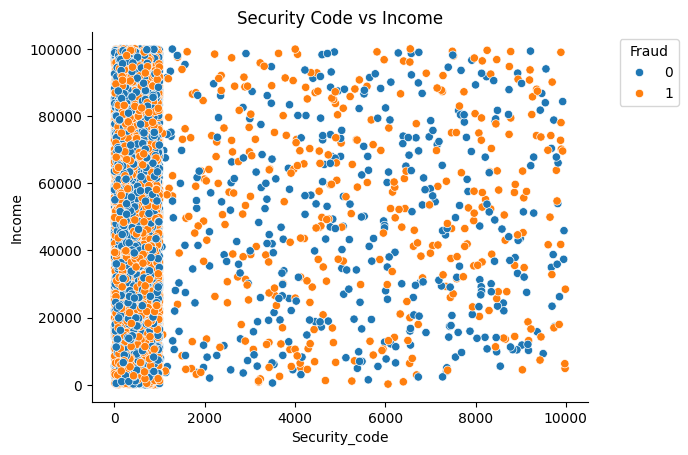

In [ ]:
sns.scatterplot(x='Security_code', y='Income', hue='Fraud', data=df)
plt.title("Security Code vs Income")
sns.despine()
plt.legend(title="Fraud", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



---



> **Explanation:**


*   Scatter Plot:
Displays the relationship between Security_code (X-axis) and Income (Y-axis), with points colored by Fraud.


---








# 5. Correlation Heatmap for Numerical Features Only

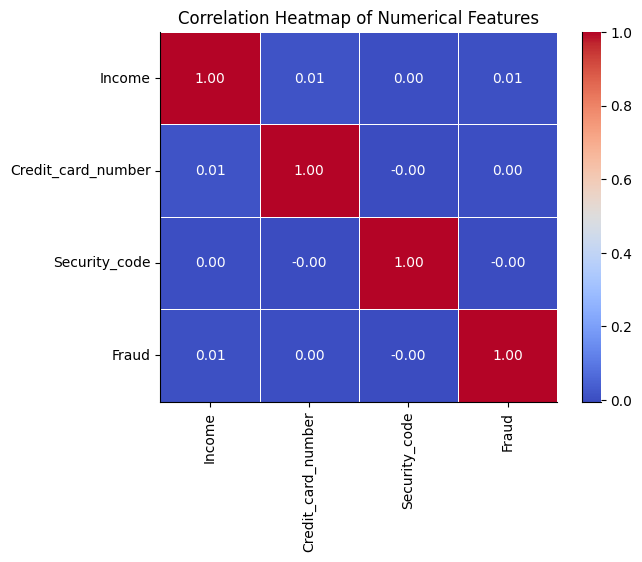

In [ ]:
# Correlation Heatmap for Numerical Features Only
numerical_data = df.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numerical_data.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
sns.despine()
plt.show()





> **Explanation:**





*   Heatmap:
Visualizes correlations between numerical features:\
Positive correlations are shown in red.\
Negative correlations are shown in blue.


*   Fraud has weak correlations with other numerical features.\
Stronger relationships between other variables may not exist, requiring feature engineering.



---





# 6. Fraud Count over Expiry Dates

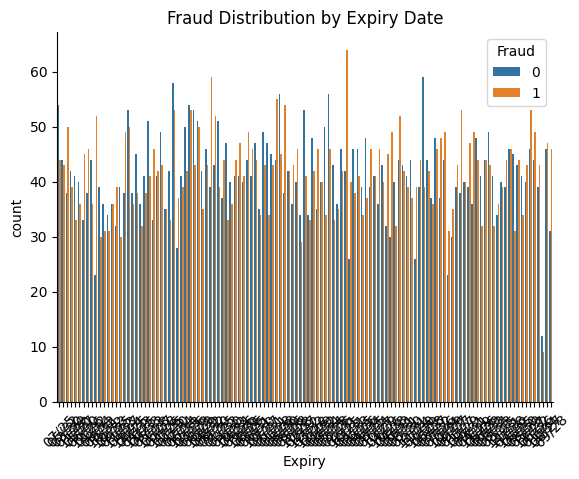

In [ ]:
sns.countplot(x='Expiry', hue='Fraud', data=df)
plt.title("Fraud Distribution by Expiry Date")
plt.xticks(rotation=45)
sns.despine()
plt.show()



---





> **Explanation:**




*   Count Plot:
Displays the count of fraudulent and non-fraudulent transactions for each Expiry date.
*   Insights:
Certain expiration dates have noticeably higher counts of fraudulent transactions.




---





# 7. Pairplot for Profession and Fraud

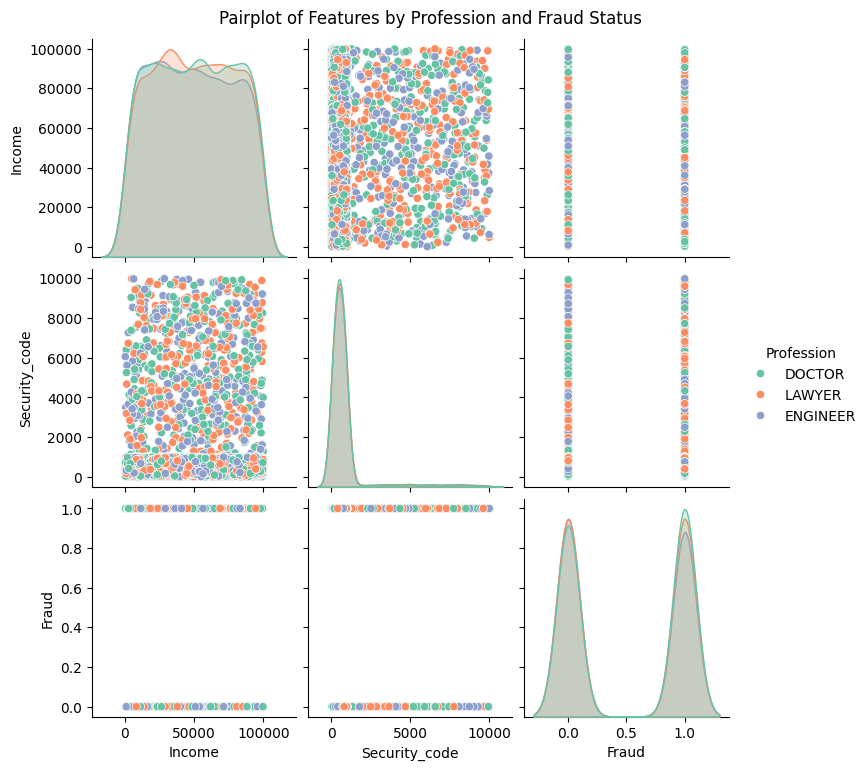

In [ ]:
# Select relevant columns for the pairplot (numerical + categorical for hue)
selected_data = df[['Income', 'Security_code', 'Fraud', 'Profession']]

# Generate the pairplot with hue set to 'Profession'
sns.pairplot(
    selected_data,
    hue='Profession',  # Different colors for each profession
    diag_kind='kde',   # Kernel Density Estimation on the diagonal
    palette='Set2',
    height=2.5
)

plt.suptitle("Pairplot of Features by Profession and Fraud Status", y=1.02)
plt.show()





---




> **Explanation:**



*   Pairplot:
Provides scatter plots for pairwise relationships between Income, Security_code, and Fraud, grouped by Profession.\
Diagonal plots show KDE distributions of numerical features.
*   Insights:
Fraud patterns and distributions differ across professions.




---







---



# **Findings & Conclusion**

### **Key Insights:**
1. Fraud rates vary significantly across professions, with some professions showing higher risk.
2. Income distribution differs between fraudulent and non-fraudulent transactions, suggesting income levels influence fraud risk.
3. Security codes and expiry dates reveal trends that financial institutions can incorporate into monitoring systems.




---



### **Takeaways:**
- Fraud detection systems should include profession-based risk profiling.
- Transaction monitoring algorithms must account for income-related patterns.
- Time-sensitive patterns, such as credit card expiry, are critical for fraud detection.



---



## **References**
- **Dataset**: Provided via course instructions. It is from **Kaggle and the dataset is called Fraud Detection in Financial Transactions**
- **Tools**: Python, Pandas, Matplotlib, Seaborn



---

